In [1]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2

In [2]:
img_path = "dataset/selfie-many-people.jpg"
img = cv2.imread(img_path)

In [3]:
detector_backends = [
    "retinaface",
]

__detector_backends = [
    "opencv",
    "ssd",
    "dlib",
    "mtcnn",
    # "fastmtcnn",
    "retinaface",
    # "mediapipe"
    "yunet",
    "yolov8",
    "centerface",
]

retinaface deteceted 7 faces


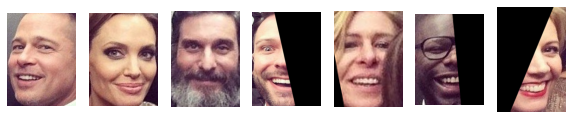

In [4]:
for detector_backend in detector_backends:
    # print("--------------")
    # print(detector_backend)

    face_objs = DeepFace.extract_faces(
        img_path=img_path,
        detector_backend=detector_backend,
        # expand_percentage=0,
    )
    print(f"{detector_backend} deteceted {len(face_objs)} faces")

    fig = plt.figure(figsize=(10, 10))
    for i, face_obj in enumerate(face_objs):
        face = face_obj["face"]

        if True:
            fig.add_subplot(1, len(face_objs), i+1)
            plt.imshow(face)
            plt.axis("off")
            # plt.show()
            # cv2.imwrite(img=face[:,:,::-1]*255, filename=f'/Users/sefik/Desktop/outputs/{detector_backend}.jpg')
        else:
            facial_area = face_obj["facial_area"]
            x = facial_area["x"]
            y = facial_area["y"]
            w = facial_area["w"]
            h = facial_area["h"]
            le = facial_area["left_eye"]
            re = facial_area["right_eye"]

            current_img = img.copy()
            current_img = cv2.rectangle(current_img, (x, y), (x + w, y + h), (67, 67, 67), 1)
            current_img = cv2.circle(current_img, (le), radius=5, color=(0, 0, 255), thickness=-1) # red
            current_img = cv2.circle(current_img, (re), radius=5, color=(255, 0, 0), thickness=-1) # blue

            plt.imshow(current_img[:,:,::-1])
            plt.axis("off")
            plt.show()
            
    plt.show()